**<h1 align="center" > Business Cases with Data Science - Case 1</h1>**


**Group members:**<br> 
Chloé Deschanel - 20240693 <br>
Diogo Carvalho - 20240694 <br>
Ingrid Lopez - 20240692 <br>
Ruben Marques- 20240352

# Table of Contents

# 1. Data Exploration

 ## 1.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Loading Data

In [2]:
data = pd.read_csv("../Data/Case1_HotelCustomerSegmentation.csv", sep=";")

In [3]:
# Display all columns
pd.set_option('display.max_columns', None)
data.sample(5)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
76241,76242,USA,75.0,368,0xD5B33825839A4B4EDF2A2F836DCF4663250A56DAE2FE...,0xA04ED55BAC3E919573B9102965149284436919BB86E5...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6158,6159,GBR,65.0,1253,0xC9BF079EFCCD2FDA0F6FE4919ED6A743E2591F98D61D...,0xE002CEBF3FE1C503D0F01043CFDD6AC19A2907D33603...,16,289.0,42.0,0,0,1,8,4,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
19090,19091,FRA,34.0,1055,0x985D675FD53F36F506C7599E3563CF92426D00A79B5E...,0x937B396F1020284D849B44F3ED913F11E9ADF858545B...,63,382.0,134.5,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,1,0,0,1,0,0,0,0,1
36497,36498,GBR,49.0,762,0x4021AF72E9F54F0BAC6B92D31C847930D57735966EBB...,0x704B689E7B0D17A9C9DA497BF5EF4A302DBA9183D23B...,7,536.0,44.0,0,0,1,4,4,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
57706,57707,SWE,64.0,507,0x39D8FE6BF9E51B2E7643F29487A80F66C721E78C5B19...,0xCF2949B88EB1957DB73F0DA7856ED73770266DC3162E...,173,384.0,115.5,0,0,1,6,3,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0


In [4]:
# Set ID as index
data.set_index('ID', inplace=True)

| #   | Column Name        | Description                                                                                       |
|:----|:-------------------|:--------------------------------------------------------------------------------------------------|
| 1   | ID        | Customer ID customer. |
| 2   | Nationality    | Nationality of the customer in ISO 3166-1 (Alpha 3) format. |
| 3   | Age       | Age of the customer. |
| 4   | DaysSinceCreation       | Number of elapsed days since the customer was created. |
| 5   | NameHash | Hash of the customer's name. |
| 6   | DocIDHash | Hash of the customer’s personal document identification number (usually a passport or ID card). |
| 7   | AverageLeadTime | Average number of days before arrival date the customer makes bookings. |
| 8   | LodgingRevenue | Total amount of lodging revenue paid by the customer so far. |
| 9   | OtherRevenue | Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far. |
| 10  | BookingsCanceled | Number of bookings the customer made but subsequently canceled. |
| 11  | BookingsNoShowed | Number of bookings the customer made but subsequently made a "no-show". |
| 12  | BookingsCheckedin | Number of bookings the customer made, which actually ended up staying. |
| 13  | PersonNights | Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children in each booking, multiplied by the number of Nights (Length-of-stay) of the booking. |
| 14  | RoomNights | Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-of- stay) of the booking. |
| 15  | DistributionChannel | Distribution channel normally used by the customer to make bookings at the hotel. |
| 16  | MarketSegment | Current market segment of the customer. |
| 17  | SRHighFloor | Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes). |
| 18  | RLowFloor  | Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes).  | 
| 19  | SRAccessibleRoom | Indication if the customer usually asks for an accessible room (0: No, 1: Yes). |
| 20  | SRMediumFloor | Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes). |
| 21  | SRBathtub | Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes). |
| 22  | SRShower | Indication if the customer usually asks for a room with a shower (0: No, 1: Yes). |
| 23  | SRCrib  | Indication if the customer usually asks for a crib (0: No, 1: Yes). |
| 24  | SRKingSizeBed | Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes). |
| 25  | SRTwinBed | Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes). |
| 26  | SRNearElevator | Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes). |
| 27  | SRAwayFromElevator | Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes). |
| 28  | SRNoAlcoholInMiniBar | Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes). |
| 29  | SRQuietRoom | Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes). |


## 1.3. Initial Analysis

### 1.3.1. Types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

### 1.3.2. Missing values

In [22]:
data.isna().sum()

Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### 1.3.3. Duplicates

In [23]:
# Checking if we have duplicated IDs
data[data.index.duplicated() == True]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


### 1.3.4. Statistics

In [ ]:
# Maybe Separate even more
data_num = data.select_dtypes(exclude = object)
data_cat = data.select_dtypes(include = object)

In [26]:
data_num.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.64,17.24,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.03,374.66,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.83,85.12,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.85,379.13,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.68,123.58,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.00,0.08,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.00,0.03,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.74,0.73,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.33,4.63,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.20,2.30,0.0,0.0,2.0,3.0,185.00


In [27]:
data_cat.describe().T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


In [ ]:
# Separating binary columns
data_bin = data[['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
                 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
                 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']]
data_num = data_num.drop(columns=data_bin.columns)


# Data Exploration

## Objectives
* Targeted Marketing: Develop tailored campaigns for specific customer groups to improve engagement and conversions.

* Personalised Offers: Create customized promotions and packages to boost satisfaction and loyalty.

* Service Customisation: Tailor amenities and services to meet the unique needs of different segments.

* Customer Retention: Retain high-value or loyal customers by addressing their preferences.

* Pricing Strategies: Implement dynamic pricing based on segment willingness to pay and booking behavior.

* Identify High-Value Segments: Focus on the most profitable customers to maximize revenue.

* Resource Allocation: Efficiently allocate resources (staff, budget, inventory) based on segment demand.

* Market Positioning: Refine the hotel’s market position using segmentation insights to attract the right customers.

* Competitive Advantage: Differentiate offerings to stand out in the market.

* Predictive Analytics: Use data to anticipate future customer behavior and trends for proactive decision-making.

## Data Distribution

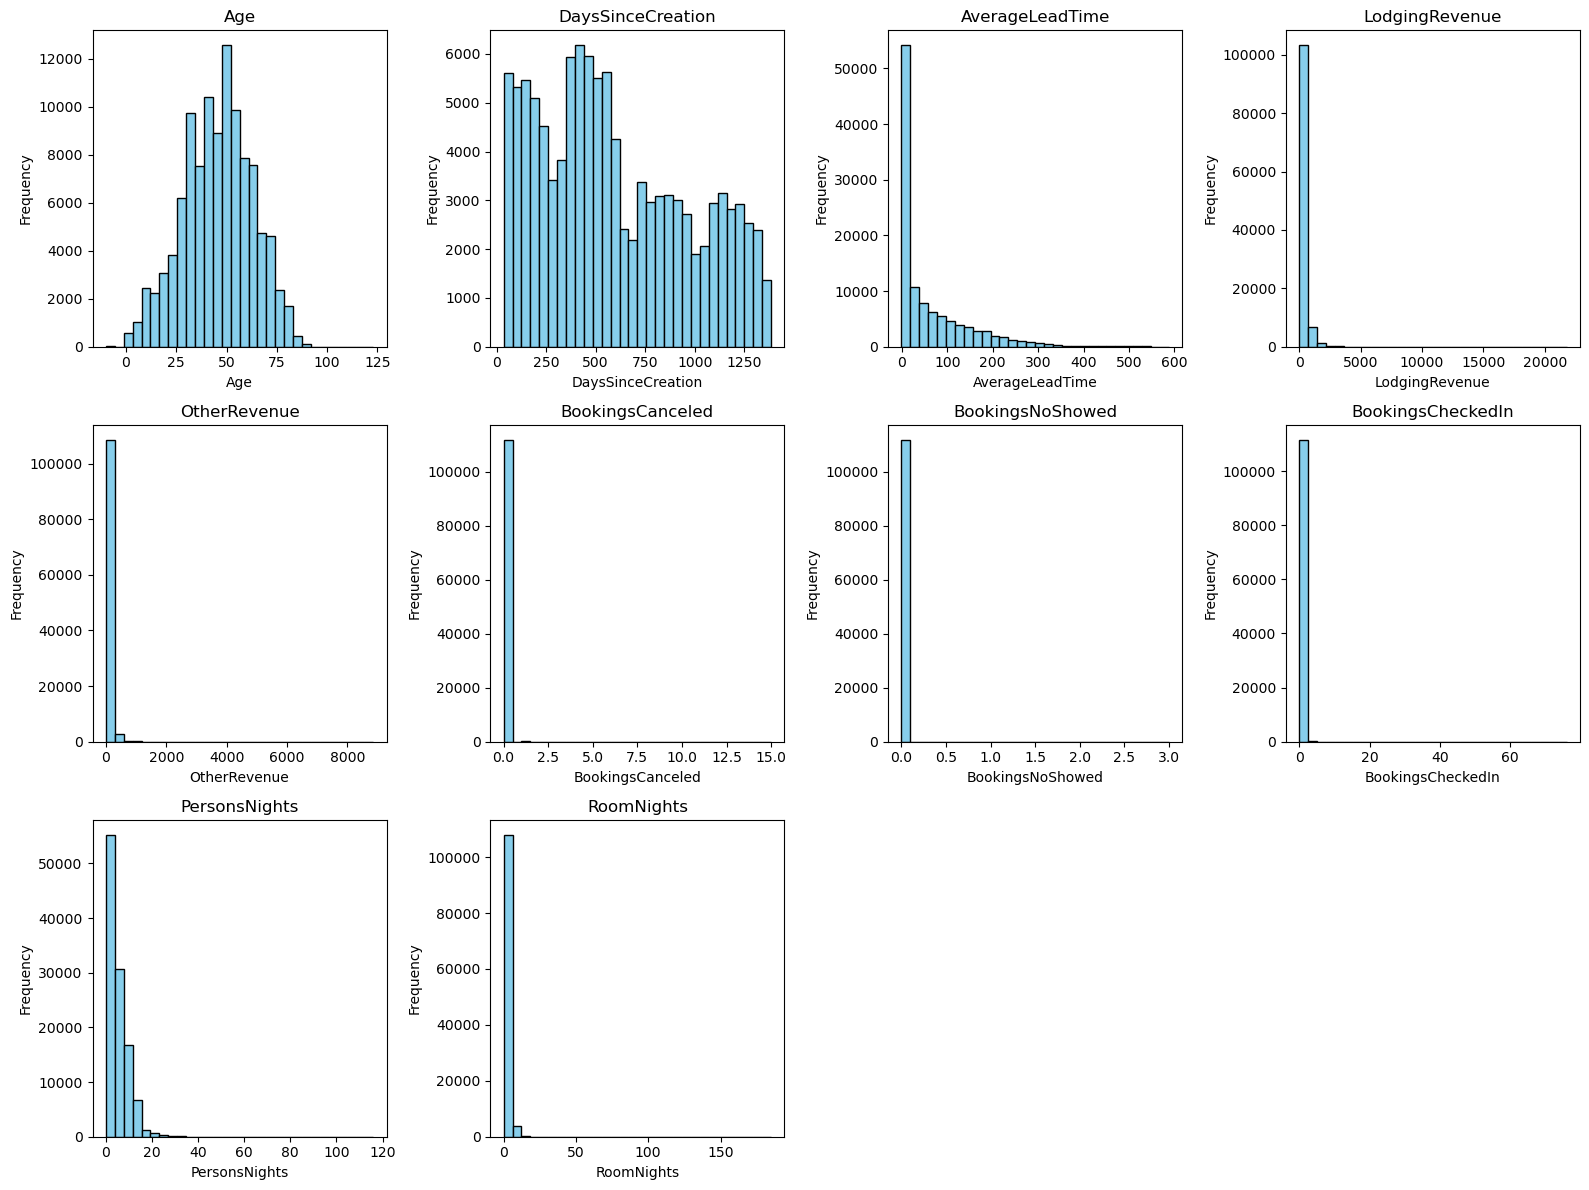

In [ ]:
# Set up the grid layout
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make indexing easier

# Loop through numerical columns and create histograms
for i, col in enumerate(data_num):
    axes[i].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


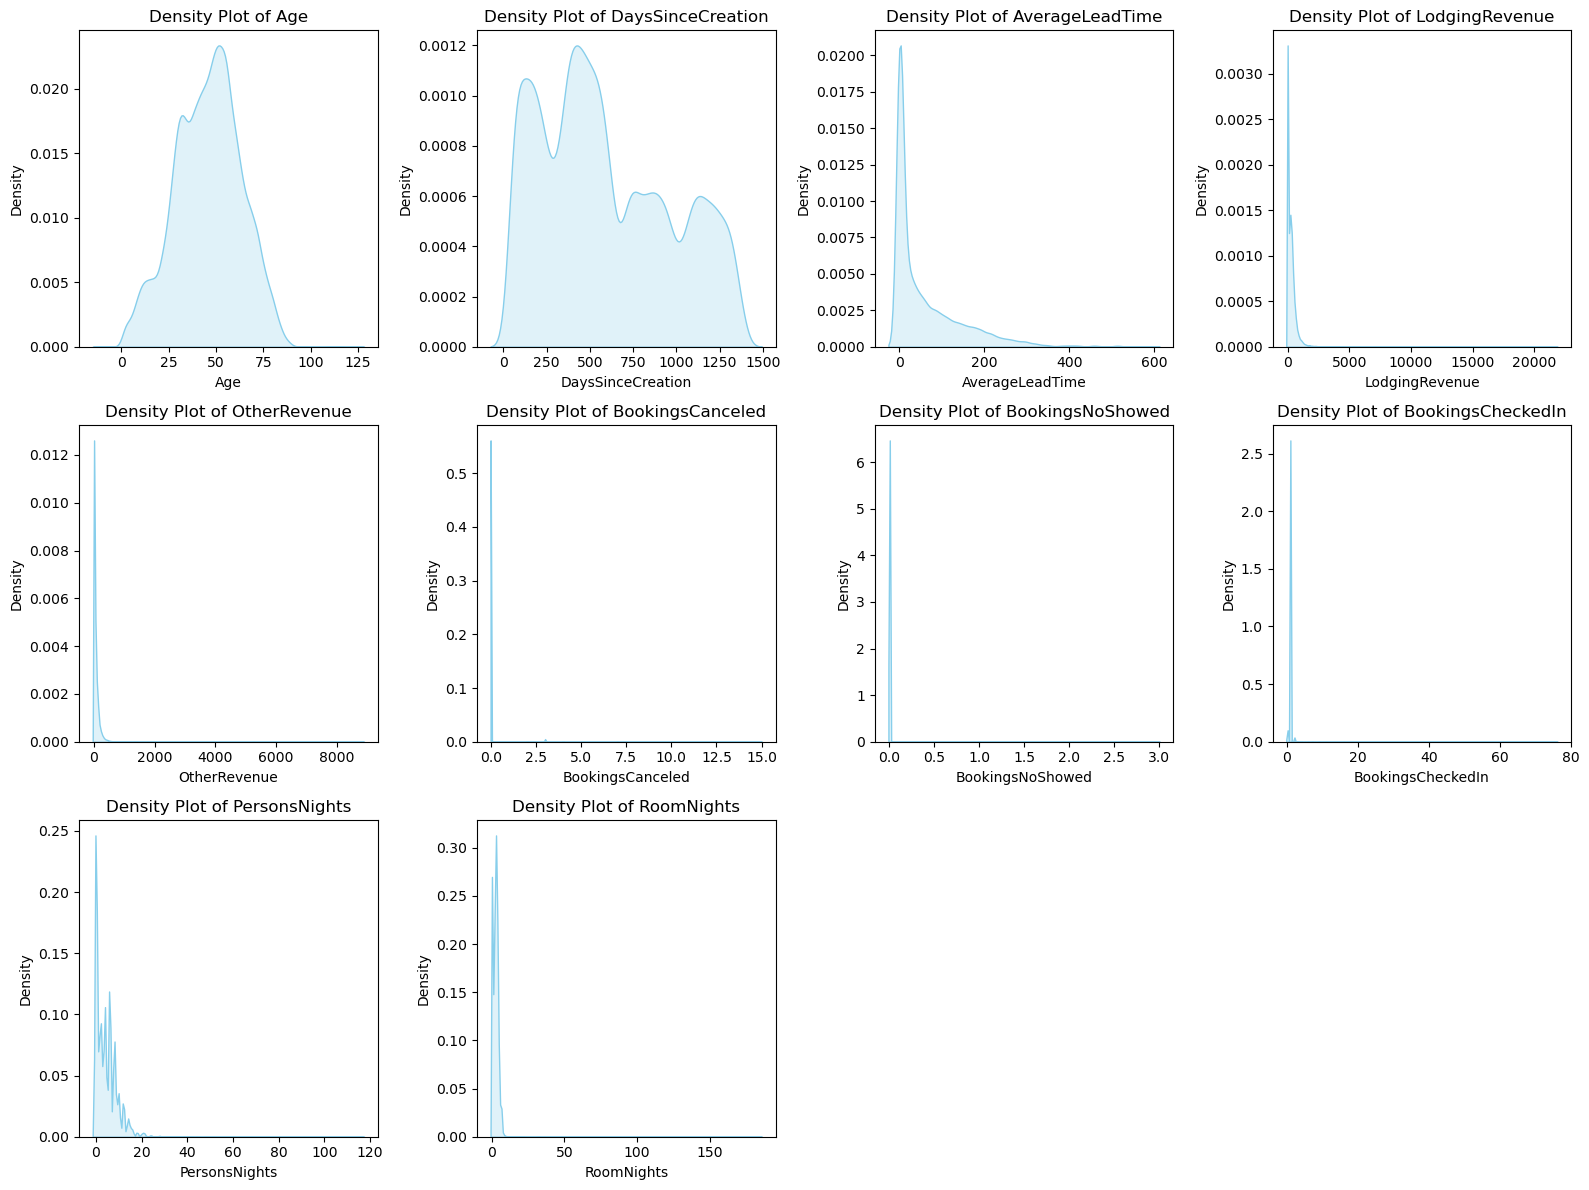

In [33]:
# Set up the grid layout (adjust rows/cols based on the number of features)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  # Flatten to make it easier to iterate

# Loop through numerical columns and plot KDE (density) for each
for i, col in enumerate(data_num):
    sns.kdeplot(data[col], fill=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Density Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


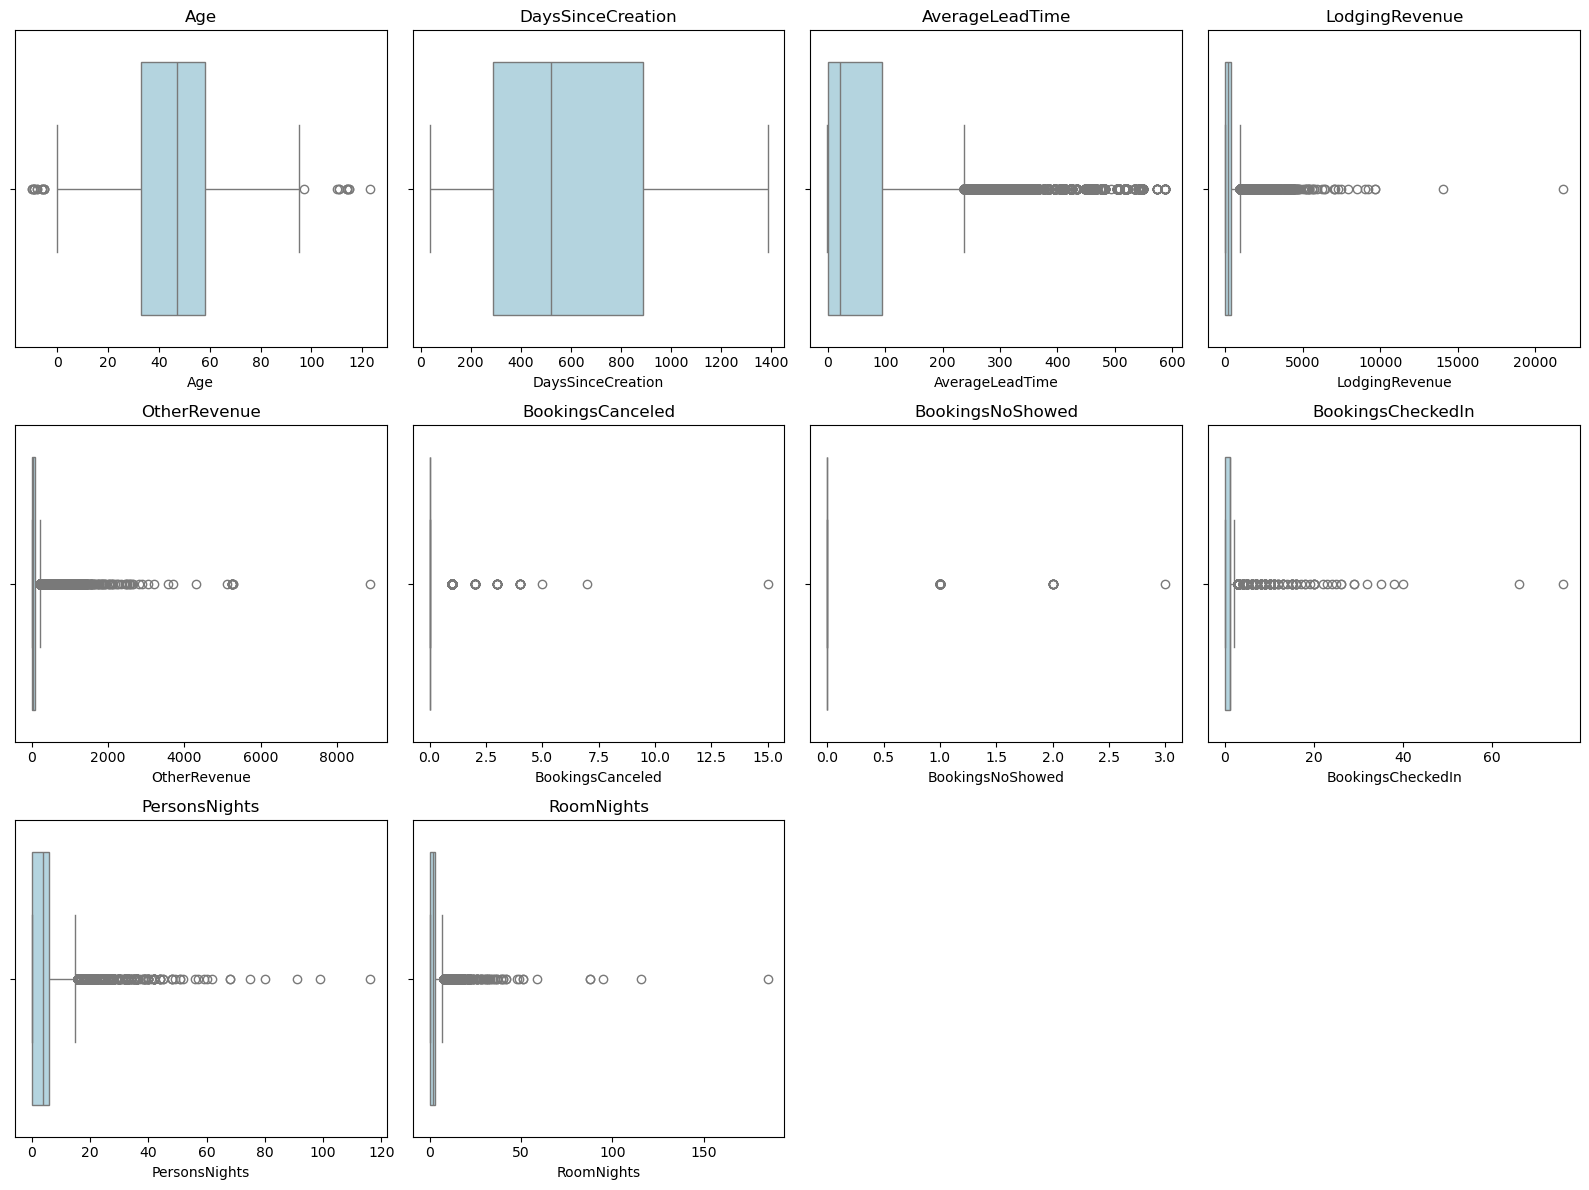

In [34]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  

for i, col in enumerate(data_num):
    sns.boxplot(x=data[col], ax=axes[i], color='lightblue')
    axes[i].set_title(col)

# Remove empty subplots (if any)
for i in range(len(data_num.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [36]:

# Filter out rows where any numerical column has a value less than 0
data_cleaned = data[(data[data_num.columns] >= 0).all(axis=1)]

# Check the shape of the cleaned data to see how many rows are removed
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (111733, 28)
Cleaned data shape: (107535, 28)


#### Making a fusion with the low-high floor 

    If its on a low floor then 1 
    If its on a medium floor then 2
    If its on a high floor then 3

In [16]:
Check0 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check0

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [17]:
# We have 1 customer that usually asks fot a high and low floor but not medium and the same for the cases bellow
Check1 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 0)]
Check1

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26127,PRT,NaN,916,0xD9D619554D9AADB4D47DBAD05FA8DC655F924173367F...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,74,506.25,92.5,0,0,1,15,5,Direct,Direct,1,1,0,0,0,0,0,1,0,0,0,0,1


In [18]:
Check2 = data[(data['SRHighFloor'] == 1) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 1)]
Check2

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
25859,SWE,51.0,921,0x70B6FD2D234235C3DE6F4B82879F6305D0E111670AB0...,0xB524FBB5D5127698F6E182836043FBA8CCD397612416...,127,2020.0,220.0,0,0,1,8,2,Travel Agent/Operator,Other,1,0,0,1,0,0,0,1,0,0,0,0,0


In [19]:
Check3 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 1) & (data['SRMediumFloor'] == 1)]
Check3

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27802,GBR,45.0,891,0x1AF54B13068BC4F019B15A1634A3058DCF8CB3BCE045...,0x3FE43086574BC0D49ECCE2AE3E9A864449F438F860A5...,90,114.0,14.0,0,0,1,2,1,Travel Agent/Operator,Other,0,1,0,1,0,0,0,0,0,0,0,0,1


In [20]:
# This just means that the customer does not ask for a specific floor
Check4 = data[(data['SRHighFloor'] == 0) & (data['SRLowFloor'] == 0) & (data['SRMediumFloor'] == 0)]
Check4

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.00,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.00,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.00,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111729,DEU,31.0,36,0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...,0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,1,0,0,0,0,0
111730,BRA,43.0,36,0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...,0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...,170,755.25,20.0,0,0,1,10,5,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
111731,BRA,37.0,36,0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...,0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...,0,0.00,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0


Uncomment the code after we dealt with the costumers above and if everyone agrees

In [50]:
# def type_of_floor(row):
#     if row['SRLowFloor'] == 1:     # preference for lower floors
#         return 1
#     elif row['SRMediumFloor'] == 1: # preference for medium floors
#         return 2
#     elif row['SRHighFloor'] == 1:    # preference for higher floors
#         return 3
#     else:                           # no preference
#         return 0 



# data['SRFloor'] = data.apply(type_of_floor, axis=1)

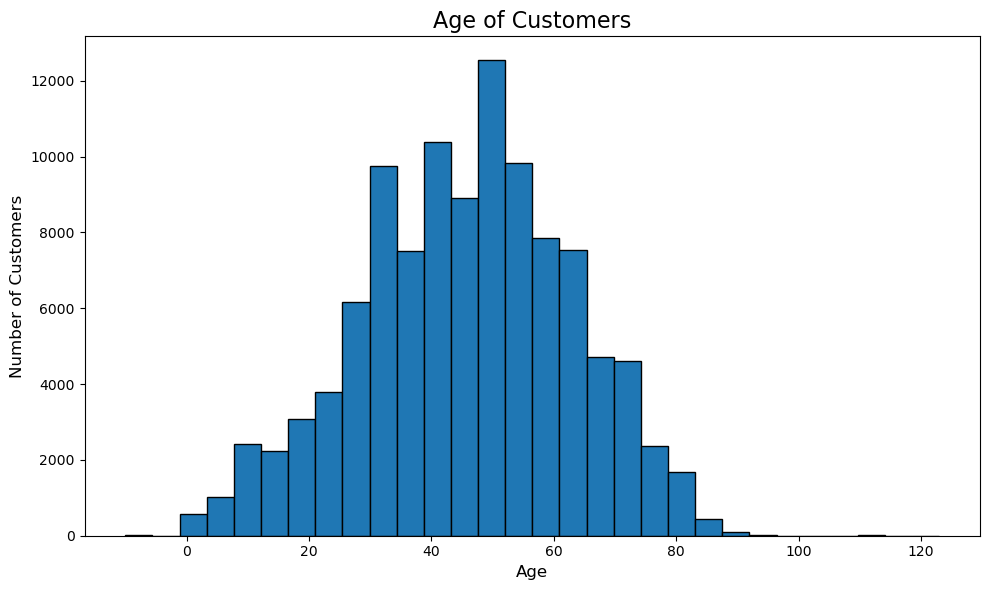

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(data["Age"], bins=30, edgecolor="black")

plt.title("Age of Customers", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()  
plt.show()

In [42]:
print(len(data[data['Age']<0]))
data[data['Age']<0]

14


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2053,BIH,-6.0,1324,0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...,0x9ED63F460C900B662B890A825398EA74E2AB649383BB...,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2469,ATF,-6.0,1319,0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...,0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...,0,0.00,0.00,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
5128,FRA,-8.0,1271,0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...,0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...,66,93.30,14.00,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
6752,GBR,-10.0,1243,0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...,0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...,22,450.00,18.00,0,0,1,1,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
8361,DEU,-6.0,1217,0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...,0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...,256,126.00,109.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0
8629,NLD,-9.0,1213,0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...,0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...,111,414.60,34.00,0,0,1,4,4,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
9920,DZA,-5.0,1193,0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...,0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...,54,138.93,29.50,0,0,1,4,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
10663,DEU,-9.0,1181,0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...,0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...,292,126.00,113.00,0,0,1,4,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
10695,DEU,-9.0,1181,0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...,0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...,292,128.00,57.50,0,0,1,2,2,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
print(len(data[data['Age']>95]))
data[data['Age']>95]

10


,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3282,PRT,115.0,1305,0x02D4575C7FE55631DBE81E8181066109AEFDCA58973F...,0xEC8ADED0F788BA1D46CEFF00FE180192B783BDA6F184...,22,79.0,25.5,0,0,1,2,1,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
18912,BEL,111.0,1058,0xE000EB79EF885B1FF6DFD46A6AD03211B70002271DD8...,0xB035518A17323A61553F309E937DC06F2CCC53E8E900...,215,140.0,164.8,0,0,1,2,2,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
25590,DEU,114.0,924,0x36BF5A087E8029783FC52501A957412690AA36E271CE...,0x1BF60C4718497A0AB8B46FF00708D3250A484DDA0FDC...,7,492.0,76.4,0,0,1,4,4,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
44525,DEU,114.0,627,0xAA6D4B36828028BE3F09FE5751DE971B7BE4B2BC038E...,0xD37FD9597B00ED4BC4EA2CB864521C48882E30DCA7AE...,7,234.0,34.5,0,0,1,4,2,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
45089,PRT,115.0,620,0xD906278493442999E6245450B8C306ABB9CA75F39032...,0xB207B868D8878FBBB1D449631EFDB684FAFC49AC57AF...,2,266.0,43.0,0,0,1,2,2,Travel Agent/Operator,Other,1,0,0,0,0,0,0,1,0,0,0,0,0
53298,ITA,123.0,543,0xE651AC190A6B9F1AEC6357AE26B7E871A54A7B5B3398...,0x21711474FF0CA1361823EDB5535B72CF6159EE1AEB43...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
58052,AUT,114.0,503,0xA5F68A67139168CF952B006354B65964A2C38D79A4F5...,0xEDE630FB631373804FBF8325A0B48E67E8A8C575E7EF...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,1
62694,NOR,97.0,467,0x1F09EB5D0201D9931BAD9BF82CA729A50644860D542F...,0x18EE62D4260E78AD984A206D021264B767BD3DA86FD8...,87,734.0,24.0,0,0,1,12,6,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0
64256,ESP,110.0,456,0x021B0CF360983B4B2F3E2F8E5932396CB2B1749EDDED...,0xABE5DDEDEC1FB4E00F82118EDEE61F525D5303E8E421...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,1


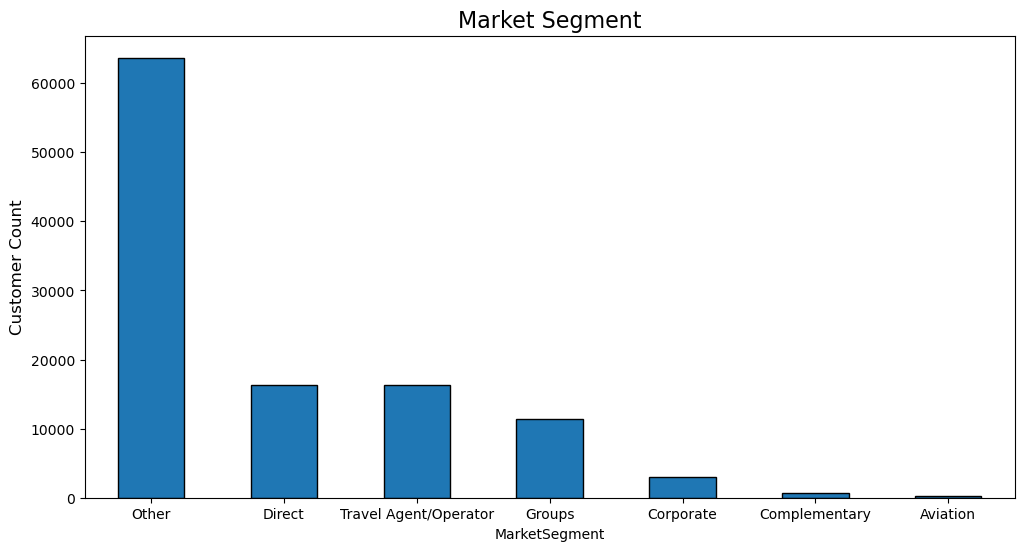

In [53]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

market_segment = data["MarketSegment"].value_counts()

market_segment.plot(kind="bar", edgecolor="black")

plt.title("Market Segment", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

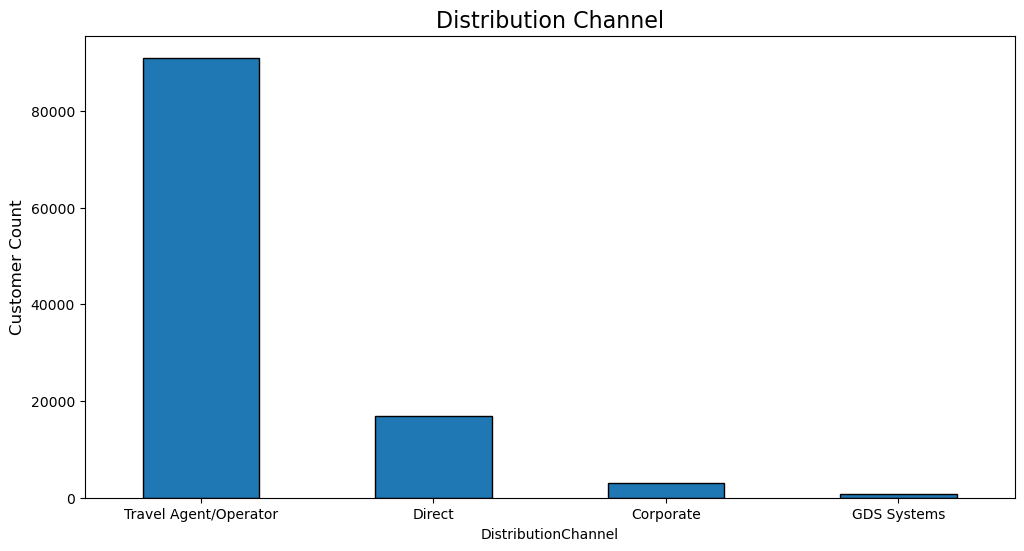

In [55]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

distribution_channel = data["DistributionChannel"].value_counts()

distribution_channel.plot(kind="bar", edgecolor="black")

plt.title("Distribution Channel", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [61]:
data["Nationality"].value_counts()

Nationality
FRA    16516
DEU    14805
PRT    14101
GBR    11462
ESP     6123
       ...  
BHS        1
TMP        1
TZA        1
PNG        1
BDI        1
Name: count, Length: 199, dtype: int64

In [60]:
countries = sorted(data["Nationality"].unique())
print(", ".join(sorted(countries)))

ABW, AFG, AGO, AIA, ALB, AND, ARE, ARG, ARM, ASM, ATA, ATF, ATG, AUS, AUT, AZE, BDI, BEL, BEN, BFA, BGD, BGR, BHR, BHS, BIH, BLR, BMU, BOL, BRA, BRB, BWA, CAF, CAN, CHE, CHL, CHN, CIV, CMR, COD, COK, COL, COM, CPV, CRI, CUB, CYM, CYP, CZE, DEU, DMA, DNK, DOM, DZA, ECU, EGY, ERI, ESP, EST, ETH, FIN, FJI, FLK, FRA, FRO, FSM, GAB, GBR, GEO, GHA, GIB, GIN, GNB, GNQ, GRC, GRD, GTM, GUF, GUY, HKG, HND, HRV, HTI, HUN, IDN, IND, IOT, IRL, IRN, IRQ, ISL, ISR, ITA, JAM, JEY, JOR, JPN, KAZ, KEN, KGZ, KIR, KNA, KOR, KWT, LAO, LBN, LBY, LCA, LIE, LKA, LTU, LUX, LVA, MAR, MCO, MDG, MDV, MEX, MKD, MLI, MLT, MMR, MNE, MOZ, MRT, MUS, MWI, MYS, NAM, NCL, NER, NGA, NIC, NLD, NOR, NPL, NRU, NZL, OMN, PAK, PAN, PCN, PER, PHL, PNG, POL, PRI, PRT, PRY, PYF, QAT, ROU, RUS, RWA, SAU, SDN, SEN, SGP, SJM, SLE, SLV, SMR, SOM, SPM, SRB, STP, SUR, SVK, SVN, SWE, SWZ, SYC, SYR, TCD, TGO, THA, TJK, TKM, TMP, TON, TTO, TUN, TUR, TWN, TZA, UGA, UKR, UMI, URY, USA, UZB, VCT, VEN, VIR, VNM, WLF, WSM, YEM, ZAF, ZWE


In [68]:
# European countries
western_europe = ["AUT", "BEL", "CHE", "DEU", "FRA", "IRL", "LIE", "LUX", "NLD", "GBR"]
eastern_europe = ["BLR", "BGR", "CZE", "HUN", "MDA", "POL", "ROU", "RUS", "SVK", "UKR"]
nordic_countries = ["DNK", "FIN", "ISL", "NOR", "SWE", "SJM", "FRO"]
southern_europe = ["ALB", "AND", "BIH", "CYP", "ESP", "GRC", "HRV", "ITA", "MLT", "MKD", "MNE", "PRT", "SMR", "SRB", 
                   "SVN"]


# Asian countries
asian_countries = ["AFG", "ARM", "AZE", "BHR", "BGD", "BRN", "BTN", "CHN", "HKG", "IDN", "IND", "IRN", "IRQ", 
                   "ISR", "JOR", "JPN", "KAZ", "KGZ", "KOR", "KWT", "LAO", "LBN", "LKA", "MDV", "MMR", "MNG", 
                   "MYS", "NPL", "OMN", "PAK", "PHL", "QAT", "SAU", "SGP", "SYR", "TJK", "TKM", "TMP", "THA", 
                   "TUR", "TWN", "UZB", "VNM", "YEM"]

# African countries
african_countries = ["AGO", "BDI", "BEN", "BFA", "CAF", "CIV", "CMR", "COD", "COM", "CPV", "DJI", "DZA", "EGY", 
                     "ERI", "ETH", "GAB", "GHA", "GIN", "GMB", "GNB", "GNQ", "KEN", "LBR", "LBY", "LSO", "MAR", 
                     "MDG", "MLI", "MOZ", "MRT", "MUS", "MWI", "NAM", "NER", "NGA", "RWA", "SDN", "SEN", "SLE", 
                     "SOM", "STP", "SWZ", "SYC", "TCD", "TGO", "TUN", "TZA", "UGA", "ZAF", "ZMB", "ZWE"]

# North American countries (including Central America & Caribbean)
north_american_countries = ["AIA", "ATG", "ABW", "BHS", "BRB", "BMU", "BLZ", "CAN", "CRI", "CUB", "CYM", "DMA", 
                            "DOM", "GRD", "GTM", "HND", "HTI", "JAM", "KNA", "LCA", "MEX", "NIC", "PAN", "PRI", 
                            "SLV", "TTO", "USA", "VIR", "VCT"]

# South American countries
south_american_countries = ["ARG", "BOL", "BRA", "CHL", "COL", "ECU", "GUY", "PRY", "PER", "SUR", "URY", "VEN"]

# Oceania countries
oceania_countries = ["AUS", "FJI", "KIR", "NRU", "NCL", "NZL", "PCN", "PNG", "PYF", "SLB", "TON", "WSM", "WLF"]

region = [western_europe, eastern_europe, nordic_countries, southern_europe, asian_countries, african_countries, 
          north_american_countries, south_american_countries, oceania_countries]
region_names = ["Western Europe", "Eastern Europe", "Nordic Countries", "Southern Europe", "Asia", "Africa", 
                "North America", "South America", "Oceania"]

# Mapping dictionary
country_region_mapping = {country: region for region, countries in zip(region_names, region) for country in countries}

# Create new column 
data["Region"] = data["Nationality"].map(country_region_mapping)

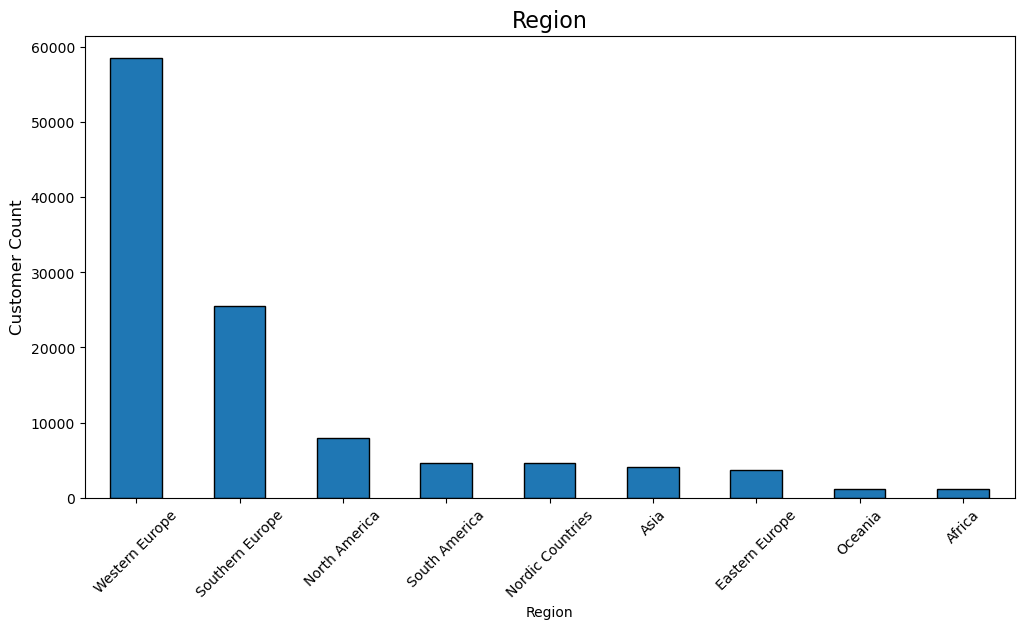

In [70]:
# Plot a bar chart 
plt.figure(figsize=(12, 6))

region_nationality = data["Region"].value_counts()

region_nationality.plot(kind="bar", edgecolor="black")

plt.title("Region", fontsize=16)
plt.ylabel("Customer Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

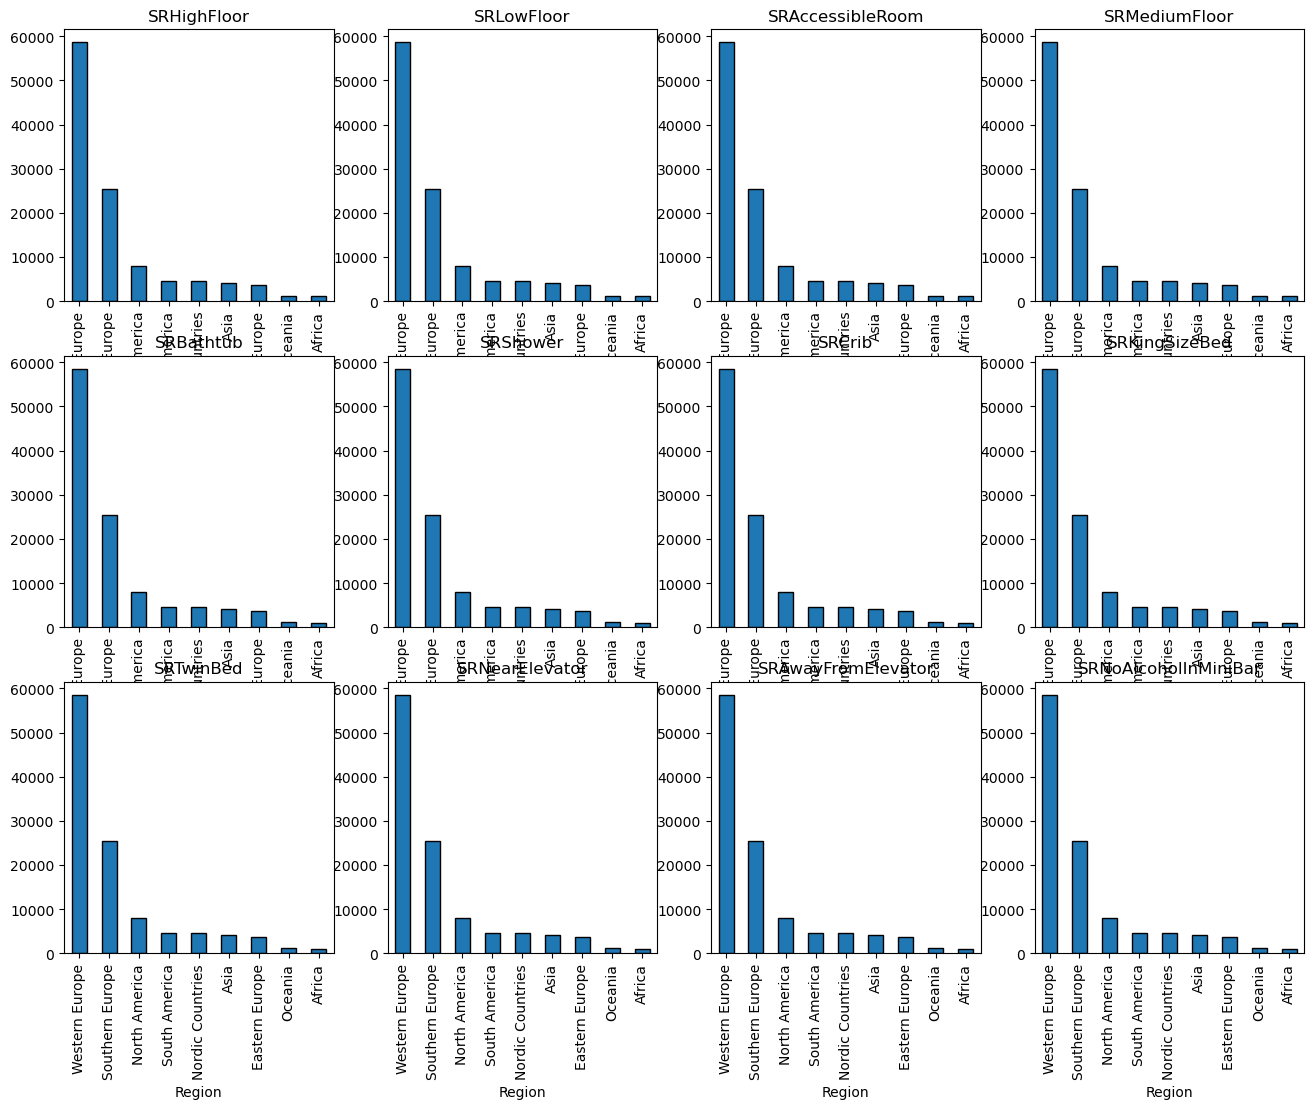

In [71]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16,12))  
axes = axes.flatten()  

for i, col in enumerate(data_bin):
    data["Region"].value_counts().plot(kind="bar", edgecolor="black", ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots (if any)
for i in range(len(data_bin.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()